<a href="https://colab.research.google.com/github/SaadARazzaq/Gradient-Descent-LR/blob/main/src.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

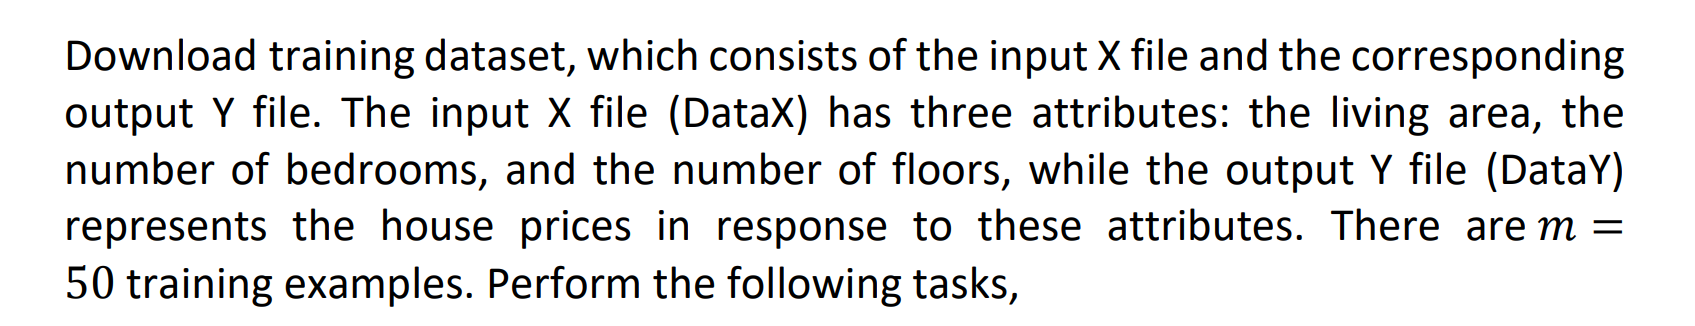

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [308]:
# Read 'DataX.dat' and 'DataY.dat' files with whitespace (space or tab) as delimiter, without assuming headers.
X = pd.read_csv('DataX.dat', sep='\s+', header=None)
Y = pd.read_csv('DataY.dat', sep='\s+', header=None)

In [309]:
X.head(5)



,0,1,2
0,2104.0,3.0,2.0
1,1600.0,3.0,2.0
2,2400.0,3.0,2.0
3,1416.0,2.0,1.0
4,3000.0,4.0,3.0


In [310]:
Y.head(5)

,0
0,399900.0
1,329900.0
2,369000.0
3,232000.0
4,539900.0


In [311]:
X[3] = 1 # Add a third column with all values = 1

In [312]:
X.head(5)

,0,1,2,3
0,2104.0,3.0,2.0,1
1,1600.0,3.0,2.0,1
2,2400.0,3.0,2.0,1
3,1416.0,2.0,1.0,1
4,3000.0,4.0,3.0,1


In [313]:
X = X[[3, 0, 1, 2]]  # Rearranging the columns

In [314]:
X.columns = ['x_0', 'x_1', 'x_2', 'x_3']  # Renaming the columns

In [315]:
Y.columns = ['y_0'] # Renaming the columns

In [316]:
X.head(5)

,x_0,x_1,x_2,x_3
0,1,2104.0,3.0,2.0
1,1,1600.0,3.0,2.0
2,1,2400.0,3.0,2.0
3,1,1416.0,2.0,1.0
4,1,3000.0,4.0,3.0


In [317]:
Y.head(5)

,y_0
0,399900.0
1,329900.0
2,369000.0
3,232000.0
4,539900.0


In [318]:
# First both dataframes to numpy array/ feature matrix

X_train = X.values # For Case A
Y_train = Y.values # For Case A

In [319]:
print(f"Shape of X: {X_train.shape}")
print(f"Shape of Y: {Y_train.shape}")

Shape of X: (50, 4)
Shape of Y: (50, 1)


In [320]:
print(X_train)
print("--------------------------------")
print(Y_train)
print("--------------------------------")

[[1.000e+00 2.104e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.600e+03 3.000e+00 2.000e+00]
 [1.000e+00 2.400e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.416e+03 2.000e+00 1.000e+00]
 [1.000e+00 3.000e+03 4.000e+00 3.000e+00]
 [1.000e+00 1.985e+03 4.000e+00 3.000e+00]
 [1.000e+00 1.534e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.427e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.380e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.494e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.940e+03 4.000e+00 3.000e+00]
 [1.000e+00 2.000e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.890e+03 3.000e+00 2.000e+00]
 [1.000e+00 4.478e+03 5.000e+00 3.000e+00]
 [1.000e+00 1.268e+03 3.000e+00 2.000e+00]
 [1.000e+00 2.300e+03 4.000e+00 3.000e+00]
 [1.000e+00 1.320e+03 2.000e+00 1.000e+00]
 [1.000e+00 1.236e+03 3.000e+00 2.000e+00]
 [1.000e+00 2.609e+03 4.000e+00 3.000e+00]
 [1.000e+00 3.031e+03 4.000e+00 3.000e+00]
 [1.000e+00 1.767e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.888e+03 2.000e+00 1.000e+00]
 [1.000e+00 1.604e+03 3.000e+00 2.000e+00]
 [1.000e+00

# **Case A:**

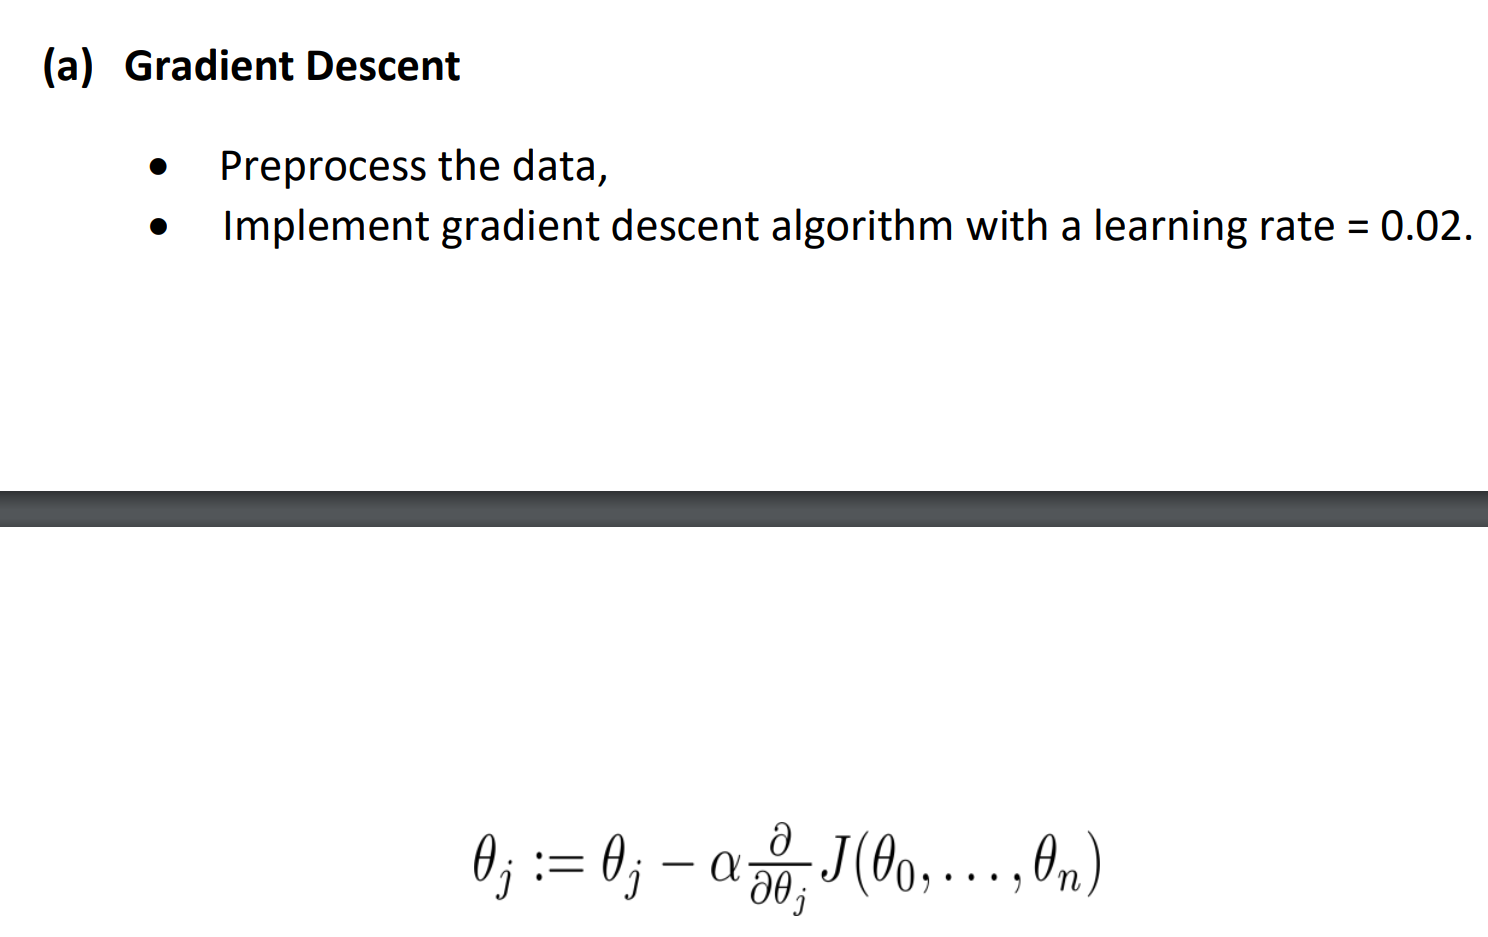

## ⭐ Preprocessing Using feature scaling

### We normalize

In [321]:
for i in range(5):
    mean_x1 = np.mean(X_train[:, 1])
    std_x1 = np.std(X_train[:, 1])
    X_train[:, 1] = (X_train[:, 1] - mean_x1) / (std_x1)

for i in range(5):
    mean_x2 = np.mean(X_train[:, 2])
    std_x2 = np.std(X_train[:, 2])
    X_train[:, 2] = (X_train[:, 2] - mean_x2) / (std_x2)

for i in range(5):
    mean_x3 = np.mean(X_train[:, 3])
    std_x3 = np.std(X_train[:, 3])
    X_train[:, 3] = (X_train[:, 3] - mean_x3) / (std_x3)

In [322]:
print(f"Values of normalized x_0 are: {np.min(X_train[0])} <= x_0 <= {np.max(X_train[0])}")
print(f"Values of normalized x_1 are: {np.min(X_train[1])} <= x_1 <= {np.max(X_train[1])}")
print(f"Values of normalized x_2 are: {np.min(X_train[2])} <= x_2 <= {np.max(X_train[2])}")
print(f"Values of normalized x_3 are: {np.min(X_train[3])} <= x_3 <= {np.max(X_train[3])}")

Values of normalized x_0 are: -0.24854790640047997 <= x_0 <= 1.0
Values of normalized x_1 are: -0.5044594772666824 <= x_1 <= 1.0
Values of normalized x_2 are: -0.24854790640047997 <= x_2 <= 1.0
Values of normalized x_3 are: -1.8019723214034802 <= x_3 <= 1.0


In [323]:
# Reshaping

X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")

Shape of X_train: (4, 50)
Shape of Y_train: (1, 50)


## **⭐ Implementing Gradient Descent**

### **Formulas**

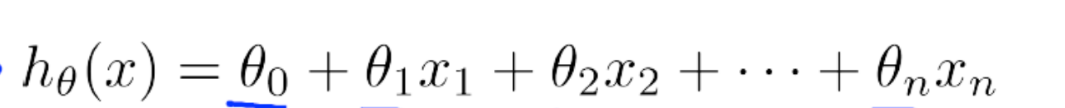

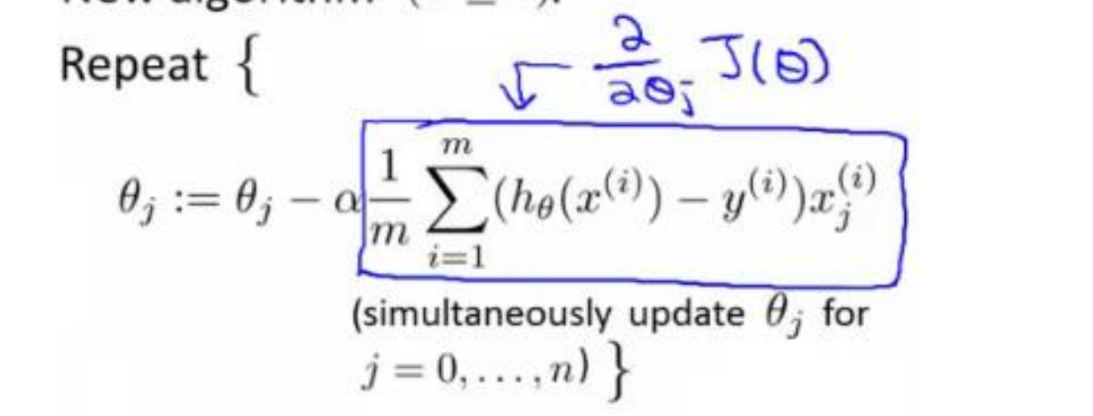

---

In [324]:
X_train.shape

(4, 50)

In [325]:
def training_model(X, y, alpha, total_iterations):
    m = X.shape[1]
    n = X.shape[0]

    cost_list = []
    # Initialize theta with zeros
    theta = np.zeros((n, 1))

    for i in range(total_iterations):
        predicted = np.dot(theta.T, X)

        cost = (1 / (2 * m)) * np.sum((predicted - y) ** 2) # Calculate the cost using MSE

        # Compute the gradient
        gradient = (1 / m) * np.dot(X, (predicted - y).T)

        theta = theta - alpha * gradient # Update the parameters

        cost_list.append(cost)

        if i % (total_iterations // 10) == 0:
            print(f"Cost after {i} iterations is {cost}")

    return theta, cost_list


In [326]:
iterations = 60000
theta, costs = training_model(X_train, Y_train, 0.02, iterations)

Cost after 0 iterations is 63703357920.07
Cost after 6000 iterations is 2168815479.4035683
Cost after 12000 iterations is 2168795542.024405
Cost after 18000 iterations is 2168795531.720504
Cost after 24000 iterations is 2168795531.7151785
Cost after 30000 iterations is 2168795531.7151756
Cost after 36000 iterations is 2168795531.7151756
Cost after 42000 iterations is 2168795531.715175
Cost after 48000 iterations is 2168795531.7151747
Cost after 54000 iterations is 2168795531.7151747


In [327]:
print("Values of parameters are:"); print(theta)

Values of parameters are:
[[335373.9       ]
 [100780.43797099]
 [ 38772.16952469]
 [-40555.622871  ]]


## **Plotting**

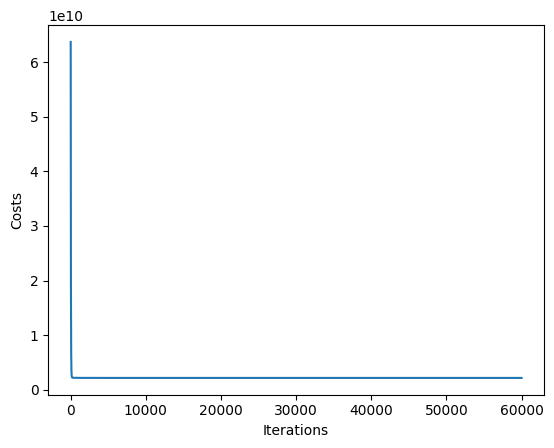

In [339]:
plt.plot(np.arange(iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Costs')
plt.show()

# **Case B:**

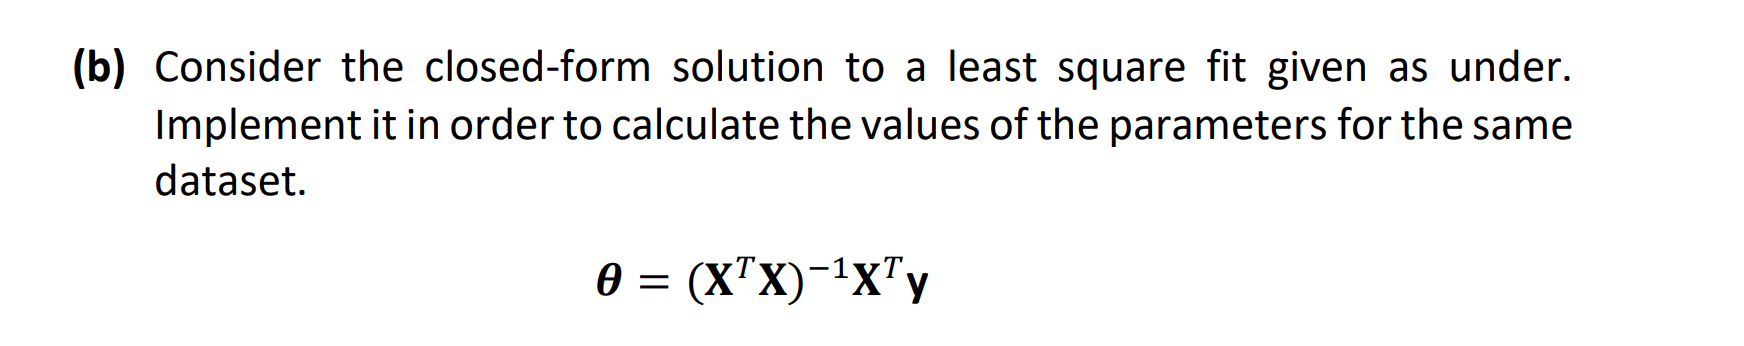

In [266]:
# Make feature matrix
x = X.values
y = Y.values

In [267]:
a = np.dot(x.T, x) # Implement (X^T.X) of formula

In [268]:
a_inv = np.linalg.pinv(a) # Implement (X^T.X)^-1 of formula

In [269]:
b = np.dot(x.T, y) # Implement (X^T.y) of formula

In [271]:
theta_norm = np.dot(a, b) # Implement (X^T.X)^-1.(X^T.y) of formula i.e. whole formula

In [272]:
print("Closed form solution is:"); print(theta_norm)

Closed form solution is:
[[3.75230868e+15]
 [8.66955207e+18]
 [1.24429786e+16]
 [8.56005900e+15]]


# **Case C:**

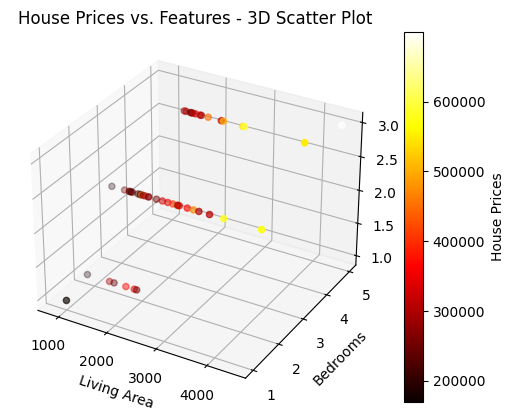

In [340]:
from mpl_toolkits.mplot3d import Axes3D

X = np.loadtxt("DataX.dat")
Y = np.loadtxt("DataY.dat")

# Extract individual features
living_area = X[:, 0]
bedrooms = X[:, 1]
floors = X[:, 2]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color gradient based on house prices
sc = ax.scatter(living_area, bedrooms, floors, c=Y, cmap=plt.hot())

# Customize the axes labels
ax.set_xlabel('Living Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Floors')
ax.set_title('House Prices vs. Features - 3D Scatter Plot')

# Add a color bar to show the price range
cbar = plt.colorbar(sc)
cbar.set_label('House Prices')

plt.show()


# **Case D:**

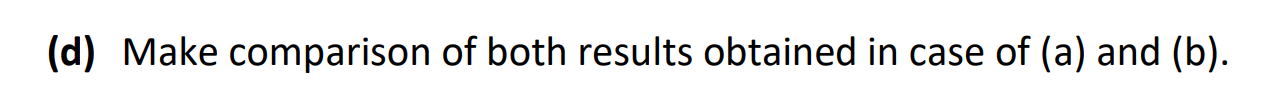

###***- Case A:***

Values of parameters:

* Intercept (θ0): 335,373.9
* Coefficient for Living Area (θ1): 100,780.44
* Coefficient for Bedrooms (θ2): 38,772.17
* Coefficient for Floors (θ3): -40,555.62

###***- Case B:***

**Closed form solution:**

These parameter values are extremely large, e.g., θ0 ≈ 3.75e+15, θ1 ≈ 8.67e+18, θ2 ≈ 1.24e+16, θ3 ≈ 8.56e+15.

##***Comparison:***

####**Scale of Parameter Values:**

**- Case A:**

The parameter values are in a reasonable range and can be interpreted directly. For example, the coefficient for the Living Area (θ1) suggests that, on average, an increase of 1 unit in the living area results in an increase of approximately $100,780.44 in house price.


**- Case B:**

The parameter values in Case B are exceptionally large and likely indicate a problem with the model or numerical instability. It's not practical to interpret such large parameter values in the context of a linear regression model.

####**Interpretability:**

**- Case A** provides interpretable coefficients that can be used to understand the relationships between the input features (Living Area, Bedrooms, and Floors) and the output (House Prices).

**- Case B** Parameter values are so large that they do not provide meaningful insights or interpretations.

####**Potential Issues:**

**- Case B** Parameter values suggest numerical instability or problems with the modeling process. Such large parameter values are typically indicative of issues like multicollinearity, improper feature scaling, or divergence in the optimization algorithm.